Following http://www.pyrunner.com/weblog/2016/05/26/compressed-sensing-python/#fnref:1

In [3]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx

In [4]:
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

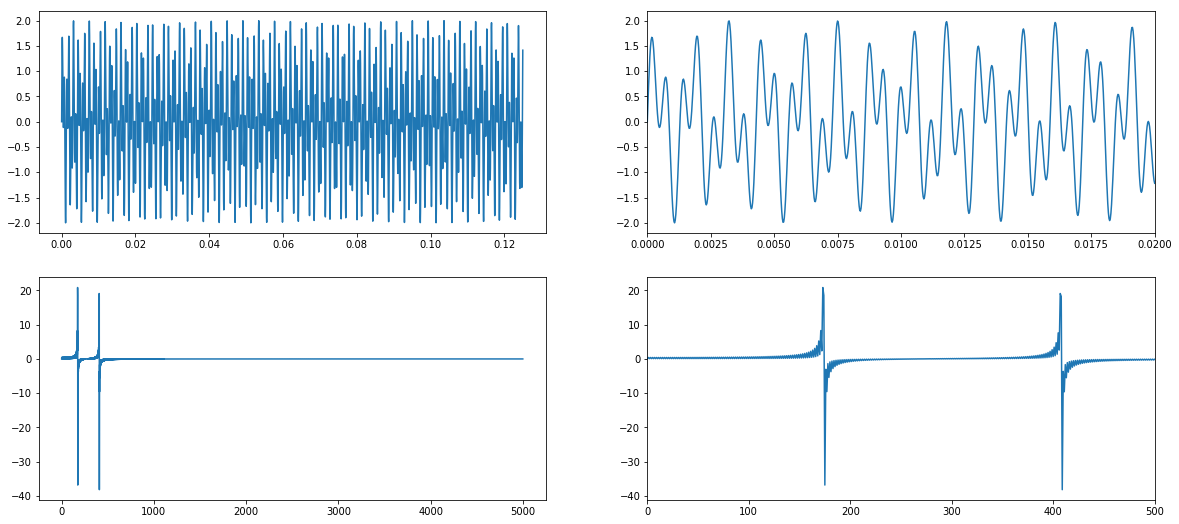

In [27]:
plt.figure(figsize = (20,9))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (20,9))
ax1.plot(t,y)
ax3.plot(yt)
ax2.plot(t,y)
ax2.set_xlim([0,.02])
ax4.plot(yt)
ax4.set_xlim([0,500])
plt.show()

In [28]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

(0, 0.025)

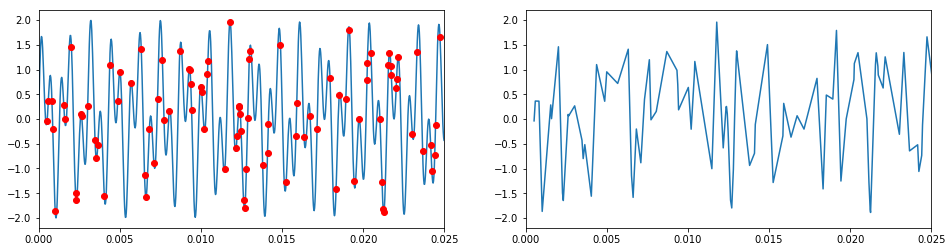

In [40]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize=(16,4))
ax1.plot(t,y)
ax1.plot(t2,y2,'ro')
ax1.set_xlim([0,0.025])
ax2.plot(t2,y2)
ax2.set_xlim([0,0.025])

In [43]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
print(A.shape)
A = A[ri]
print(A.shape)

(5000, 5000)
(500, 5000)


In [44]:
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -5.859e-23  +2e+04  1e+00  1e-02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +1.320e+02  +1.321e+02  +1e+04  9e-01  5e-03  5e-01  1e+00  0.6390  9e-02   1  1  1 |  0  0
 2  +1.665e+02  +1.667e+02  +9e+03  7e-01  4e-03  5e-01  9e-01  0.4128  6e-01   1  2  0 |  0  0
 3  +2.089e+02  +2.091e+02  +5e+03  4e-01  2e-03  4e-01  5e-01  0.7426  5e-01   1  1  0 |  0  0
 4  +2.530e+02  +2.531e+02  +2e+03  2e-01  1e-03  2e-01  2e-01  0.6916  3e-01   1  0  1 |  0  0
 5  +2.874e+02  +2.875e+02  +1e+03  1e-01  6e-04  1e-01  1e-01  0.6705  3e-01   1  1  1 |  0  0
 6  +3.137e+02  +3.138e+02  +7e+02  6e-02  3e-04  6e-02  7e-02  0.6773  3e-01   1  1  1 |  0  0
 7  +3.299e+02  +3.299e+02  +4e+02  3e-02  2e-04  3e-02  4e-02  0.5495  2e-01   1  1  1 |  0  0
 8  +3.402e+02  +3.402e+02  +2e+02  1e-02  8e-

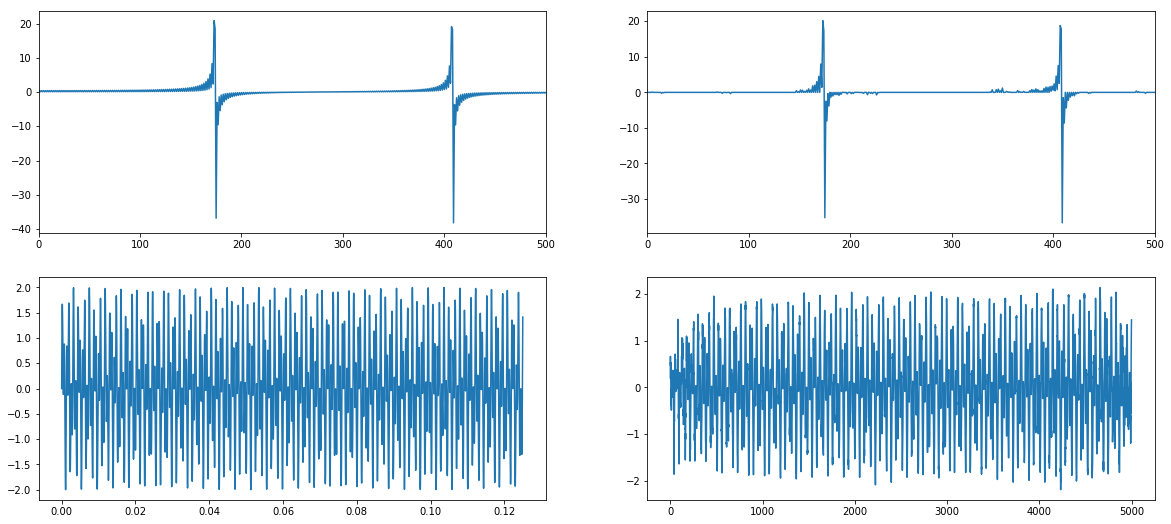

In [51]:
x = np.squeeze(np.array(vx.value))
sig = spfft.idct(x, norm='ortho', axis=0)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (20,9))
ax1.plot(yt)
ax1.set_xlim([0,500])
ax2.plot(x)
ax2.set_xlim([0,500])
ax3.plot(t,y)
ax4.plot(sig)

In [52]:
sig.shape

(5000,)

In [54]:
np.max(x)

20.180431896324137

In [55]:
np.max(t)

0.125

In [57]:
1/20.18

0.049554013875123884

In [59]:
1/np.max(yt)

0.047929526899146473